# Using Hood - Hud continuum data from Johnson 1990 (J Phon)

In [1]:
%load_ext autoreload
import GCMPy as gp
%aimport GCMPy
%autoreload 1
import math
import random
import matplotlib.pyplot as plt
#%matplotlib inline
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy.optimize import minimize
import seaborn as sns

sns.set(style='ticks', context='notebook')
colors=["#045447","#A6262E","#FFBB00","#253060","#8EAB27","#36B5AA"]
sns.set_palette(colors)

In [2]:
pb52=pd.read_csv('pb52.csv')
pbbark = gp.HzToBark(pb52,["F0","F1","F2","F3"])
pbbark.sample(5)

,type,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z2,z3
289,m,m,15,STRUT,2,110,660,960,2450,0.894686,6.223664,8.284247,14.364444
1366,c,m,69,TRAP,1,260,970,2400,3200,2.609910,8.345666,14.227798,16.096357
427,m,m,22,TRAP,2,132,670,1850,2560,1.161644,6.299924,12.487979,14.654425
569,m,m,29,STRUT,2,117,608,1120,2700,0.980241,5.817539,9.219091,15.003691
790,w,f,40,PALM,1,200,960,1280,3000,1.952407,8.284247,10.061605,15.685726


In [3]:
j90=pd.read_csv('johnson1990.csv')
j90bark=gp.HzToBark(j90,["F0","F1","F2","F3"])
j90bark

,vowel,F0,F1,F2,F3,z0,z1,z2,z3
0,FOOT,120,474,1111,2416,1.016731,4.691011,9.169092,14.271865
1,STRUT,120,578,1189,2464,1.016731,5.575666,9.592925,14.402152
2,FOOT,240,474,1111,2416,2.394727,4.691011,9.169092,14.271865
3,STRUT,240,578,1189,2464,2.394727,5.575666,9.592925,14.402152


In [4]:
cval=25
dimsvals={'z0':1,'z1':.761,'z2':.681,'z3':.407}
dimslist = list(dimsvals.keys())
catslist=['vowel','type']

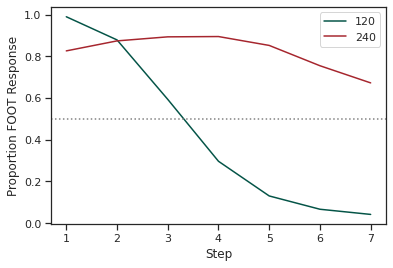

In [5]:
startvowel = "FOOT"
endvowel = "STRUT"
speakerlist = [120,240]
sptype = "F0"
stimdata = j90bark.copy()
clouddata = pbbark.copy()
datalist = []


for sp in speakerlist:
    # set start and end
    strt = {"vowel":startvowel,sptype:sp}
    nd = {"vowel":endvowel,sptype:sp}
    # make continuum
    cnt = gp.continuum(stimdata,strt,nd,dimslist,steps=7,stimdetails=False)
    # make choices
    chcs = gp.multicat(cnt,clouddata,catslist,dimsvals,cval,exclude_self=True, N=1,fc={"vowel":[startvowel,endvowel]})
    datalist.append(chcs)

gp.cpplot(datalist,"vowel", speakerlist)



## Compare to Peterson & Barney "m" and "w" averages

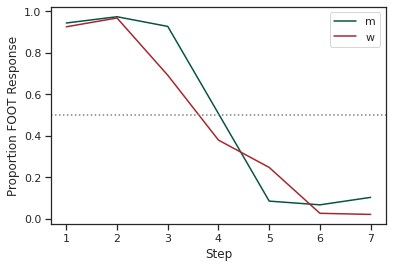

In [6]:
startvowel = "FOOT"
endvowel = "STRUT"
speakerlist = ["m","w"]
sptype = "type"
stimdata = gp.datasummary(pbbark,catslist,dimslist)
clouddata = pbbark.copy()
datalist = []


for sp in speakerlist:
    # set start and end
    strt = {"vowel":startvowel,sptype:sp}
    nd = {"vowel":endvowel,sptype:sp}
    # make continuum
    cnt = gp.continuum(stimdata,strt,nd,dimslist,steps=7,stimdetails=False)
    # make choices
    chcs = gp.multicat(cnt,clouddata,catslist,dimsvals,cval,exclude_self=True, N=1,fc={"vowel":[startvowel,endvowel]})
    datalist.append(chcs)

gp.cpplot(datalist,"vowel", speakerlist)


# Why is 240 Hz acting so weird?

### gp.continuum created the same continuum as Johnson 1990 stimuli </br>
F1	F2	F3 </br> 
474	1111	2416 </br>
491	1124	2424 </br>
509	1137	2432 </br>
526	1150	2440 </br>
543	1163	2448 </br>
561	1176	2456 </br>
578	1189	2464 </br>

In [7]:
# make the 240 continuum
start = {"vowel":"FOOT","F0":240}
end = {"vowel": "STRUT","F0":240}
dimensions = ["F0","F1","F2","F3","z0","z1","z2","z3"]
cont240 = gp.continuum(j90bark,start,end,dimensions,steps=7,stimdetails=False)
cont240

,F0,F1,F2,F3,z0,z1,z2,z3
0,240.0,474.000000,1111.0,2416.0,2.394727,4.691011,9.169092,14.271865
1,240.0,491.333333,1124.0,2424.0,2.394727,4.838453,9.239730,14.293579
2,240.0,508.666667,1137.0,2432.0,2.394727,4.985896,9.310369,14.315294
3,240.0,526.000000,1150.0,2440.0,2.394727,5.133338,9.381008,14.337008
4,240.0,543.333333,1163.0,2448.0,2.394727,5.280781,9.451647,14.358723
5,240.0,560.666667,1176.0,2456.0,2.394727,5.428223,9.522286,14.380437
6,240.0,578.000000,1189.0,2464.0,2.394727,5.575666,9.592925,14.402152


### Every stimulus is categorized as w, FOOT

In [8]:
choices240 = gp.multicat(cont240,pbbark,catslist,dimsvals,cval,exclude_self=True, N=1,fc={"vowel":["FOOT","STRUT"]})

In [9]:
choices240

,F0,F1,F2,F3,z0,z1,z2,z3,vowelChoice,vowelProb,typeChoice,typeProb
0,240.0,474.000000,1111.0,2416.0,2.394727,4.691011,9.169092,14.271865,FOOT,0.826052,w,0.959738
1,240.0,491.333333,1124.0,2424.0,2.394727,4.838453,9.239730,14.293579,FOOT,0.873992,w,0.945027
2,240.0,508.666667,1137.0,2432.0,2.394727,4.985896,9.310369,14.315294,FOOT,0.893407,w,0.930113
3,240.0,526.000000,1150.0,2440.0,2.394727,5.133338,9.381008,14.337008,FOOT,0.894831,w,0.930356
4,240.0,543.333333,1163.0,2448.0,2.394727,5.280781,9.451647,14.358723,FOOT,0.852274,w,0.928467
5,240.0,560.666667,1176.0,2456.0,2.394727,5.428223,9.522286,14.380437,FOOT,0.754933,w,0.918851
6,240.0,578.000000,1189.0,2464.0,2.394727,5.575666,9.592925,14.402152,FOOT,0.672641,w,0.920799


### If we use Hz not Bark, probability for FOOT = 1.0

In [13]:
dimsvals_240={'F0':1,'F1':.761,'F2':.681,'F3':.407}
dimslist_240 = list(dimsvals_240.keys())

gp.multicat(cont240,pbbark,catslist,dimsvals_240,cval,exclude_self=True, N=1,fc={"vowel":["FOOT","STRUT"]})

,F0,F1,F2,F3,z0,z1,z2,z3,vowelChoice,vowelProb,typeChoice,typeProb
0,240.0,474.000000,1111.0,2416.0,2.394727,4.691011,9.169092,14.271865,FOOT,1.0,w,1.0
1,240.0,491.333333,1124.0,2424.0,2.394727,4.838453,9.239730,14.293579,FOOT,1.0,w,1.0
2,240.0,508.666667,1137.0,2432.0,2.394727,4.985896,9.310369,14.315294,FOOT,1.0,w,1.0
3,240.0,526.000000,1150.0,2440.0,2.394727,5.133338,9.381008,14.337008,FOOT,1.0,w,1.0
4,240.0,543.333333,1163.0,2448.0,2.394727,5.280781,9.451647,14.358723,FOOT,1.0,w,1.0
5,240.0,560.666667,1176.0,2456.0,2.394727,5.428223,9.522286,14.380437,FOOT,1.0,w,1.0
6,240.0,578.000000,1189.0,2464.0,2.394727,5.575666,9.592925,14.402152,FOOT,1.0,w,1.0


### If we set w = 1 for z0-z2, .5 for z3, very similar to first result

In [14]:
dimsvals_240={'z0':1,'z1':1,'z2':1,'z3':0.5}
dimslist_240 = list(dimsvals_240.keys())

gp.multicat(cont240,pbbark,catslist,dimsvals_240,cval,exclude_self=True, N=1,fc={"vowel":["FOOT","STRUT"]})

,F0,F1,F2,F3,z0,z1,z2,z3,vowelChoice,vowelProb,typeChoice,typeProb
0,240.0,474.000000,1111.0,2416.0,2.394727,4.691011,9.169092,14.271865,FOOT,0.908547,w,0.986419
1,240.0,491.333333,1124.0,2424.0,2.394727,4.838453,9.239730,14.293579,FOOT,0.892239,w,0.909409
2,240.0,508.666667,1137.0,2432.0,2.394727,4.985896,9.310369,14.315294,FOOT,0.883553,w,0.851568
3,240.0,526.000000,1150.0,2440.0,2.394727,5.133338,9.381008,14.337008,FOOT,0.864484,w,0.849677
4,240.0,543.333333,1163.0,2448.0,2.394727,5.280781,9.451647,14.358723,FOOT,0.811828,w,0.848069
5,240.0,560.666667,1176.0,2456.0,2.394727,5.428223,9.522286,14.380437,FOOT,0.715913,w,0.824415
6,240.0,578.000000,1189.0,2464.0,2.394727,5.575666,9.592925,14.402152,FOOT,0.635869,w,0.814729


### If we take away the Forced Choice aspect, it's still all FOOT

In [16]:
dimsvals_240=dimsvals
dimslist_240 = list(dimsvals_240.keys())
gp.multicat(cont240,pbbark,catslist,dimsvals_240,cval,exclude_self=True, N=1,fc=None)

,F0,F1,F2,F3,z0,z1,z2,z3,vowelChoice,vowelProb,typeChoice,typeProb
0,240.0,474.000000,1111.0,2416.0,2.394727,4.691011,9.169092,14.271865,FOOT,0.826052,w,0.959738
1,240.0,491.333333,1124.0,2424.0,2.394727,4.838453,9.239730,14.293579,FOOT,0.873992,w,0.945027
2,240.0,508.666667,1137.0,2432.0,2.394727,4.985896,9.310369,14.315294,FOOT,0.893407,w,0.930113
3,240.0,526.000000,1150.0,2440.0,2.394727,5.133338,9.381008,14.337008,FOOT,0.894831,w,0.930356
4,240.0,543.333333,1163.0,2448.0,2.394727,5.280781,9.451647,14.358723,FOOT,0.852274,w,0.928467
5,240.0,560.666667,1176.0,2456.0,2.394727,5.428223,9.522286,14.380437,FOOT,0.754933,w,0.918851
6,240.0,578.000000,1189.0,2464.0,2.394727,5.575666,9.592925,14.402152,FOOT,0.672641,w,0.920799
